In [1]:
import numpy as np
from fancyimpute import IterativeSVD
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.16249637 0.2095499  0.17060303 ... 0.23328231 0.04403516 0.12265249]
 [0.04616644 0.0595347  0.0484696  ... 0.06627725 0.01251072 0.03484649]
 [0.19825358 0.25566122 0.20814411 ... 0.28461593 0.05372507 0.14964209]
 ...
 [0.22088295 0.2848433  0.23190242 ... 0.317103   0.05985744 0.16672277]
 [0.01154817 0.01489213 0.01212428 ... 0.01657873 0.00312946 0.00871657]
 [0.37445049 0.48287888 0.39313118 ... 0.53756695 0.10147296 0.28263576]]

Noisy Matrix (with Homoscedastic Noise):
[[-4.23318520e-02  1.54322711e-01  2.54344877e-01 ...  2.74275660e-01
  -1.75235581e-01 -7.79070293e-02]
 [ 5.26592009e-02 -1.97713732e-01 -6.19482023e-02 ...  1.78902259e-01
  -1.03025062e-01 -2.70683545e-02]
 [ 2.78654852e-01  3.11368625e-01  3.88160272e-01 ...  2.26928920e-01
   1.87824600e-01  1.30078293e-01]
 ...
 [ 1.93165903e-01  4.07949588e-01  3.22074465e-01 ...  1.29043028e-01
   6.38344908e-02  1.16936110e-01]
 [ 1.94643726e-01 -2.38151316e-02 -2.07006642e-01 ... -6.8

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix)
K=5

[IterativeSVD] Iter 1: observed MAE=0.077609
[IterativeSVD] Iter 2: observed MAE=0.074246
[IterativeSVD] Iter 3: observed MAE=0.068259
[IterativeSVD] Iter 4: observed MAE=0.057809
[IterativeSVD] Iter 5: observed MAE=0.052435


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.077609
[IterativeSVD] Iter 2: observed MAE=0.074246
[IterativeSVD] Iter 3: observed MAE=0.068259
[IterativeSVD] Iter 4: observed MAE=0.057809
[IterativeSVD] Iter 5: observed MAE=0.052435
[ 0.09055016  0.32199644 -0.11590068 -0.16182078 -0.18616542 -0.29359612
  0.03611019 -0.1854557  -0.01903268  0.07177726  0.103509   -0.36283528
 -0.22159377  0.06105816  0.18381554  0.22583342  0.12363918 -0.21142315
  0.246621    0.1039876  -0.16458569 -0.37877852  0.073001   -0.08422831
 -0.11208787 -0.13415322  0.08218269  0.33008769  0.18634951  0.12515317
  0.14590292  0.03036533  0.24484087 -0.18125664  0.18696852  0.15325805
  0.31532585 -0.14855546 -0.25622019 -0.13138848 -0.03394839  0.21967603
  0.00975228  0.29584473  0.01204413  0.17930656  0.13632916 -0.04541415
 -0.18814997 -0.07381389]
[-0.29418287  0.13829806 -0.03473196  0.0555205   0.09541103  0.05483652
  0.1726

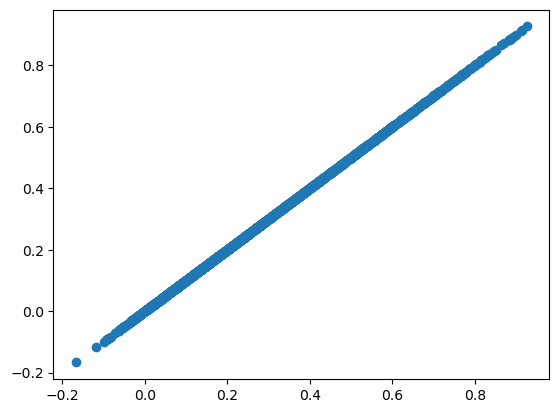

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

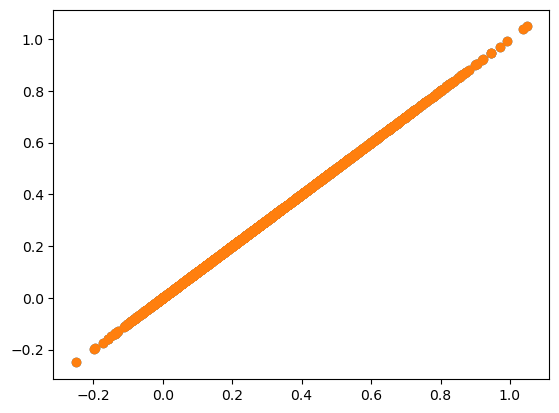

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00674786, 0.00674786, 0.00674786, ..., 0.00674786, 0.00674786,
        0.00674786],
       [0.00674786, 0.00674786, 0.00674786, ..., 0.00674786, 0.00674786,
        0.00674786],
       [0.00674786, 0.00674786, 0.00674786, ..., 0.00674786, 0.00674786,
        0.00674786],
       ...,
       [0.00674786, 0.00674786, 0.00674786, ..., 0.00674786, 0.00674786,
        0.00674786],
       [0.00674786, 0.00674786, 0.00674786, ..., 0.00674786, 0.00674786,
        0.00674786],
       [0.00674786, 0.00674786, 0.00674786, ..., 0.00674786, 0.00674786,
        0.00674786]])

In [9]:
 
mycebmf.update_loading_factor_k(k=0)

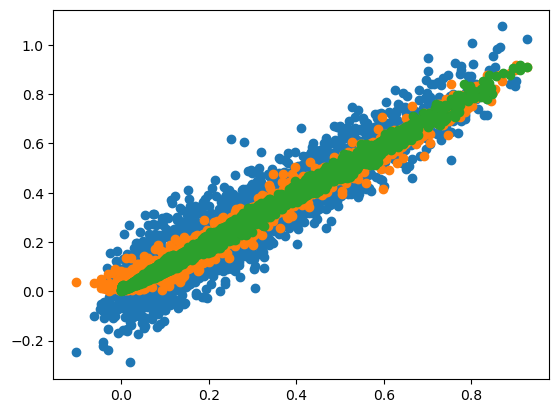

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

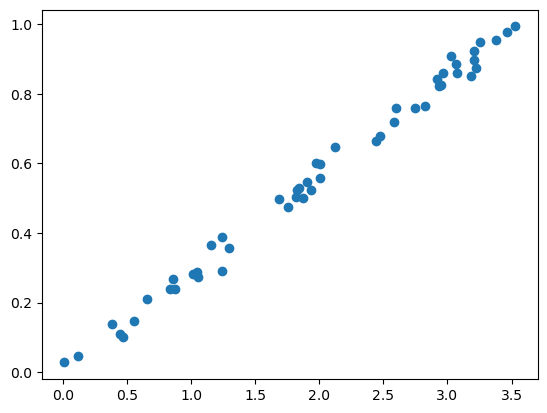

In [11]:
plt.scatter(mycebmf.L[:,0], u)

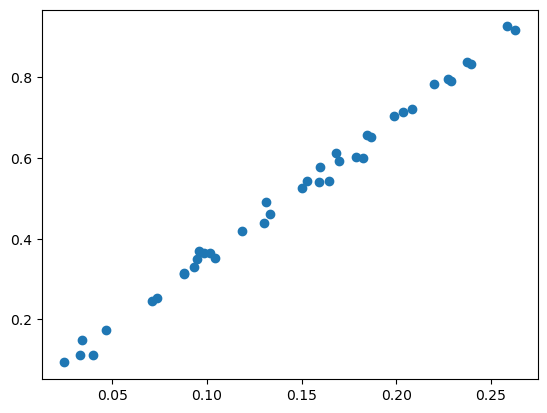

In [12]:
plt.scatter(mycebmf.F[:,0], v)

In [13]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
mycebmf.kl_l

array([-172,  -40,  -36,  -33,  -28])

In [15]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     =mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [16]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

32.88348178411387

In [17]:
mycebmf.tau

array([[117.07687618, 117.07687618, 117.07687618, ..., 117.07687618,
        117.07687618, 117.07687618],
       [117.07687618, 117.07687618, 117.07687618, ..., 117.07687618,
        117.07687618, 117.07687618],
       [117.07687618, 117.07687618, 117.07687618, ..., 117.07687618,
        117.07687618, 117.07687618],
       ...,
       [117.07687618, 117.07687618, 117.07687618, ..., 117.07687618,
        117.07687618, 117.07687618],
       [117.07687618, 117.07687618, 117.07687618, ..., 117.07687618,
        117.07687618, 117.07687618],
       [117.07687618, 117.07687618, 117.07687618, ..., 117.07687618,
        117.07687618, 117.07687618]])

In [18]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[-166  -16  -21   -9   -7]
[-140  -12  -15    0   -1]


In [19]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

1809.5577417068619
[-166  -16  -21   -9   -7]
[-140  -12  -15    0   -1]
104.41152265353757
-2222.1339578563393
[inf, 1373.9912370954528, 1422.5577417068619]


In [20]:
mycebmf.iter()
print(mycebmf.obj)

[inf, 1373.9912370954528, 1422.5577417068619, 1449.347684797669]


In [21]:
for i in range(10):
    mycebmf.iter()



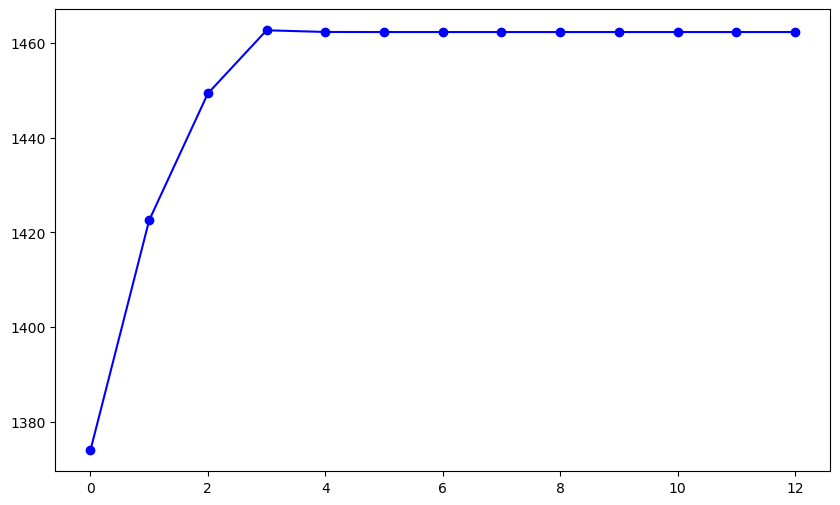

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')